### Figure 3 (Journal of Climate submission; Molina et al.)

Global annual (a) mean surface temperature ($^{\circ}$C) and (b-d) northward heat transport (Pwatt) of the CESM1 control, Global and Pacific experiments, and the Pacific Salt experiment, as indicated in the legend. Northward heat transport shown for (b) 24-degree N latitude in the Atlantic, (c) 20-degree N latitude in the Pacific, and (d) 14-S latitude in the Pacific.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.colors as colorss
from datetime import timedelta
from climatico.util import weighted_mean
import subprocess
import copy
from datetime import timedelta
from scipy.ndimage import gaussian_filter

In [2]:
from config import directory_figs, directory_data

In [3]:
# surface temperatures

file_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.cam.h0.TS.*.nc'
file_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.cam.h0.TS.*.nc'
file_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.cam.h0.TS.*.nc'
file_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.cam.h0.TS.*.nc'
file_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.cam.h0.TS.*.nc'
file_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.*.nc'

# open file
ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
ds_g02sv_ts = weighted_mean(ds_g02sv['TS'].resample(time='AS').mean(skipna=True), 'lat') - 273.15

ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
ds_g04sv_ts = weighted_mean(ds_g04sv['TS'].resample(time='AS').mean(skipna=True), 'lat') - 273.15

ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
ds_p02sv_ts = weighted_mean(ds_p02sv['TS'].resample(time='AS').mean(skipna=True), 'lat') - 273.15

ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
ds_p04sv_ts = weighted_mean(ds_p04sv['TS'].resample(time='AS').mean(skipna=True), 'lat') - 273.15

ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
ds_psalt_ts = weighted_mean(ds_psalt['TS'].resample(time='AS').mean(skipna=True), 'lat') - 273.15

ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
ds_cntrl_ts = weighted_mean(ds_cntrl['TS'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1, 0, 0),cftime.DatetimeNoLeap(
              1599, 12, 31, 0, 0))).resample(time='AS').mean(skipna=True), 'lat') - 273.15

ds_g02sv_ts = ds_g02sv_ts.isel(time=slice(0,800)).values
ds_g04sv_ts = ds_g04sv_ts.isel(time=slice(0,800)).values
ds_p02sv_ts = ds_p02sv_ts.isel(time=slice(0,800)).values
ds_p04sv_ts = ds_p04sv_ts.isel(time=slice(0,800)).values
ds_psalt_ts = ds_psalt_ts.values
ds_cntrl_ts = ds_cntrl_ts.isel(time=slice(0,800)).values

In [4]:
file_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.N_HEAT.*.nc'
file_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.N_HEAT.*.nc'
file_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.N_HEAT.*.nc'
file_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.N_HEAT.*.nc'
file_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.N_HEAT.*.nc'
file_cntrl = 'b.e11.B1850C5CN.f09_g16.005.pop.h.N_HEAT.*.nc'

ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')

ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))

In [5]:
# northward heat transport 

file_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.N_HEAT.*.nc'
file_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.N_HEAT.*.nc'
file_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.N_HEAT.*.nc'
file_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.N_HEAT.*.nc'
file_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.N_HEAT.*.nc'
file_cntrl = 'b.e11.B1850C5CN.f09_g16.005.pop.h.N_HEAT.*.nc'

ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')

ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))

ds_g02sv_24N = ds_g02sv['N_HEAT'].sel(lat_aux_grid=23.97137).resample(time='AS').mean(skipna=True)
ds_g04sv_24N = ds_g04sv['N_HEAT'].sel(lat_aux_grid=23.97137).resample(time='AS').mean(skipna=True)
ds_p02sv_24N = ds_p02sv['N_HEAT'].sel(lat_aux_grid=23.97137).resample(time='AS').mean(skipna=True)
ds_p04sv_24N = ds_p04sv['N_HEAT'].sel(lat_aux_grid=23.97137).resample(time='AS').mean(skipna=True)
ds_psalt_24N = ds_psalt['N_HEAT'].sel(lat_aux_grid=23.97137).resample(time='AS').mean(skipna=True)
ds_cntrl_24N = ds_cntrl['N_HEAT'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1, 0, 0),cftime.DatetimeNoLeap(
               1599, 12, 31, 0, 0))).sel(lat_aux_grid=23.97137).resample(time='AS').mean(skipna=True)

ds_g02sv_20N = ds_g02sv['N_HEAT'].sel(lat_aux_grid=20.007948).resample(time='AS').mean(skipna=True)
ds_g04sv_20N = ds_g04sv['N_HEAT'].sel(lat_aux_grid=20.007948).resample(time='AS').mean(skipna=True)
ds_p02sv_20N = ds_p02sv['N_HEAT'].sel(lat_aux_grid=20.007948).resample(time='AS').mean(skipna=True)
ds_p04sv_20N = ds_p04sv['N_HEAT'].sel(lat_aux_grid=20.007948).resample(time='AS').mean(skipna=True)
ds_psalt_20N = ds_psalt['N_HEAT'].sel(lat_aux_grid=20.007948).resample(time='AS').mean(skipna=True)
ds_cntrl_20N = ds_cntrl['N_HEAT'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1, 0, 0),cftime.DatetimeNoLeap(
               1599, 12, 31, 0, 0))).sel(lat_aux_grid=20.007948).resample(time='AS').mean(skipna=True)

ds_g02sv_14S = ds_g02sv['N_HEAT'].sel(lat_aux_grid=-13.901151).resample(time='AS').mean(skipna=True)
ds_g04sv_14S = ds_g04sv['N_HEAT'].sel(lat_aux_grid=-13.901151).resample(time='AS').mean(skipna=True)
ds_p02sv_14S = ds_p02sv['N_HEAT'].sel(lat_aux_grid=-13.901151).resample(time='AS').mean(skipna=True)
ds_p04sv_14S = ds_p04sv['N_HEAT'].sel(lat_aux_grid=-13.901151).resample(time='AS').mean(skipna=True)
ds_psalt_14S = ds_psalt['N_HEAT'].sel(lat_aux_grid=-13.901151).resample(time='AS').mean(skipna=True)
ds_cntrl_14S = ds_cntrl['N_HEAT'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1, 0, 0),cftime.DatetimeNoLeap(
               1599, 12, 31, 0, 0))).sel(lat_aux_grid=-13.901151).resample(time='AS').mean(skipna=True)

ds_g02sv_nheat_atl_24N = gaussian_filter(ds_g02sv_24N.isel(time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_g04sv_nheat_atl_24N = gaussian_filter(ds_g04sv_24N.isel(time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_p02sv_nheat_atl_24N = gaussian_filter(ds_p02sv_24N.isel(time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_p04sv_nheat_atl_24N = gaussian_filter(ds_p04sv_24N.isel(time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_psalt_nheat_atl_24N = gaussian_filter(ds_psalt_24N.isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_cntrl_nheat_atl_24N = gaussian_filter(ds_cntrl_24N.isel(time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)

ds_g02sv_nheat_pac_20N = gaussian_filter(ds_g02sv_20N.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_g02sv_20N.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_g04sv_nheat_pac_20N = gaussian_filter(ds_g04sv_20N.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_g04sv_20N.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_p02sv_nheat_pac_20N = gaussian_filter(ds_p02sv_20N.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_p02sv_20N.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_p04sv_nheat_pac_20N = gaussian_filter(ds_p04sv_20N.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_p04sv_20N.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_psalt_nheat_pac_20N = gaussian_filter(ds_psalt_20N.isel(transport_reg=0,transport_comp=1) - ds_psalt_20N.isel(
                                         transport_reg=1,transport_comp=1), sigma=1.5)
ds_cntrl_nheat_pac_20N = gaussian_filter(ds_cntrl_20N.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_cntrl_20N.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)

ds_g02sv_nheat_pac_14S = gaussian_filter(ds_g02sv_14S.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_g02sv_14S.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_g04sv_nheat_pac_14S = gaussian_filter(ds_g04sv_14S.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_g04sv_14S.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_p02sv_nheat_pac_14S = gaussian_filter(ds_p02sv_14S.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_p02sv_14S.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_p04sv_nheat_pac_14S = gaussian_filter(ds_p04sv_14S.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_p04sv_14S.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)
ds_psalt_nheat_pac_14S = gaussian_filter(ds_psalt_14S.isel(transport_reg=0,transport_comp=1) - ds_psalt_14S.isel(
                                         transport_reg=1,transport_comp=1), sigma=1.5)
ds_cntrl_nheat_pac_14S = gaussian_filter(ds_cntrl_14S.isel(time=slice(0,800)).isel(transport_reg=0,transport_comp=1) - ds_cntrl_14S.isel(
                                         time=slice(0,800)).isel(transport_reg=1,transport_comp=1), sigma=1.5)

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/m

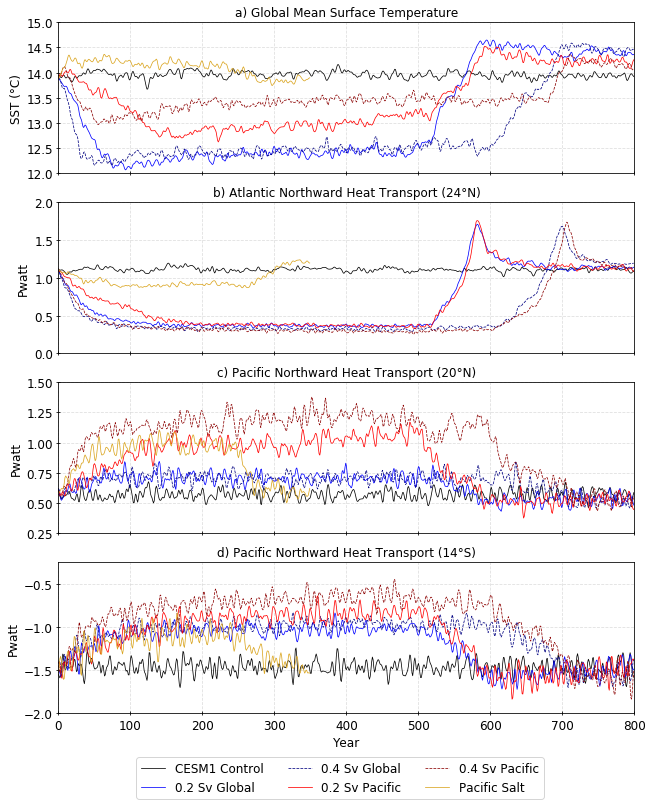

In [6]:
# -------------- create figure

a = u"\u00b0"

fig = plt.figure(figsize=(8,10))

# --------------

ax1 = plt.axes([0., 0.75, 1., 0.21])

ax1.set_title('a) Global Mean Surface Temperature', fontsize=12)

l1, = ax1.plot(gaussian_filter(ds_cntrl_ts,sigma=1.5), c='k', alpha=1.0, lw=0.75, zorder=2)
l2, = ax1.plot(gaussian_filter(ds_g02sv_ts,sigma=1.5), c='blue', alpha=1.0, lw=0.75, zorder=2)
l3, = ax1.plot(gaussian_filter(ds_g04sv_ts,sigma=1.5), c='navy', alpha=1.0, ls='--', lw=0.75, zorder=2)
l4, = ax1.plot(gaussian_filter(ds_p02sv_ts,sigma=1.5), c='red', alpha=1.0, lw=0.75, zorder=2)
l5, = ax1.plot(gaussian_filter(ds_p04sv_ts,sigma=1.5), c='darkred', alpha=1.0, ls='--', lw=0.75, zorder=2)
l6, = ax1.plot(gaussian_filter(ds_psalt_ts,sigma=1.5), c='goldenrod', alpha=1.0, lw=0.75, zorder=2)

ax1.margins(x=0)
ax1.set_xlim([0,800])
ax1.set_ylim([12,15])

ax1.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False, labelsize=12)
ax1.grid(alpha=0.4, ls='--')

ax1.set_ylabel(r'SST ('+a+'C)', fontsize=12)

# --------------

ax2 = plt.axes([0., 0.5, 1., 0.21])

ax2.set_title('b) Atlantic Northward Heat Transport (24'+a+'N)', fontsize=12)

l1, = ax2.plot(ds_cntrl_nheat_atl_24N, c='k', alpha=1.0, lw=0.75, zorder=2)
l2, = ax2.plot(ds_g02sv_nheat_atl_24N, c='blue', alpha=1.0, lw=0.75, zorder=2)
l3, = ax2.plot(ds_g04sv_nheat_atl_24N, c='navy', alpha=1.0, ls='--', lw=0.75, zorder=2)
l4, = ax2.plot(ds_p02sv_nheat_atl_24N, c='red', alpha=1.0, lw=0.75, zorder=2)
l5, = ax2.plot(ds_p04sv_nheat_atl_24N, c='darkred', alpha=1.0, ls='--', lw=0.75, zorder=2)
l6, = ax2.plot(ds_psalt_nheat_atl_24N, c='goldenrod', alpha=1.0, lw=0.75, zorder=2)

ax2.margins(x=0)
ax2.set_xlim([0,800])
ax2.set_ylim([0.,2.])

ax2.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False, labelsize=12)
ax2.grid(alpha=0.4, ls='--')

ax2.set_ylabel(r'Pwatt', fontsize=12)

# --------------

ax3 = plt.axes([0., 0.25, 1., 0.21])

ax3.set_title('c) Pacific Northward Heat Transport (20'+a+'N)', fontsize=12)

l1, = ax3.plot(ds_cntrl_nheat_pac_20N, c='k', alpha=1.0, lw=0.75, zorder=2)
l2, = ax3.plot(ds_g02sv_nheat_pac_20N, c='blue', alpha=1.0, lw=0.75, zorder=2)
l3, = ax3.plot(ds_g04sv_nheat_pac_20N, c='navy', alpha=1.0, ls='--', lw=0.75, zorder=2)
l4, = ax3.plot(ds_p02sv_nheat_pac_20N, c='red', alpha=1.0, lw=0.75, zorder=2)
l5, = ax3.plot(ds_p04sv_nheat_pac_20N, c='darkred', alpha=1.0, ls='--', lw=0.75, zorder=2)
l6, = ax3.plot(ds_psalt_nheat_pac_20N, c='goldenrod', alpha=1.0, lw=0.75, zorder=2)

ax3.margins(x=0)
ax3.set_xlim([0,800])
ax3.set_ylim([0.25,1.5])

ax3.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False, labelsize=12)
ax3.grid(alpha=0.4, ls='--')

ax3.set_ylabel(r'Pwatt', fontsize=12)

# --------------

ax4 = plt.axes([0., 0., 1., 0.21])

ax4.set_title('d) Pacific Northward Heat Transport (14'+a+'S)', fontsize=12)

l1, = ax4.plot(ds_cntrl_nheat_pac_14S, c='k', alpha=1.0, lw=0.75, zorder=2)
l2, = ax4.plot(ds_g02sv_nheat_pac_14S, c='blue', alpha=1.0, lw=0.75, zorder=2)
l3, = ax4.plot(ds_g04sv_nheat_pac_14S, c='navy', alpha=1.0, ls='--', lw=0.75, zorder=2)
l4, = ax4.plot(ds_p02sv_nheat_pac_14S, c='red', alpha=1.0, lw=0.75, zorder=2)
l5, = ax4.plot(ds_p04sv_nheat_pac_14S, c='darkred', alpha=1.0, ls='--', lw=0.75, zorder=2)
l6, = ax4.plot(ds_psalt_nheat_pac_14S, c='goldenrod', alpha=1.0, lw=0.75, zorder=2)

ax4.margins(x=0)
ax4.set_xlim([0,800])
ax4.set_ylim([-2.,-0.25])

ax4.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=True, labelsize=12)
ax4.grid(alpha=0.4, ls='--')

ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel(r'Pwatt', fontsize=12)

# --------------

ax4.legend([l1,l2,l3,l4,l5,l6], 
           ['CESM1 Control', 
            '0.2 Sv Global',
            '0.4 Sv Global',
            '0.2 Sv Pacific',
            '0.4 Sv Pacific',
            'Pacific Salt'], bbox_to_anchor=(0.125, -0.25),
            fontsize=12, ncol=3, loc='upper left')

# --------------

plt.savefig(f'{directory_figs}amocenso_fig3.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig3.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------